In [1]:
from numpy import *
from PIL import *
import pickle
from pylab import *
import os

In [2]:
import sift
import dsift
dsift = reload(dsift)
import imtools
imtools = reload(imtools)

In [3]:
def read_gesture_features_labels(path):
    # make a list of the files with .dsift at the end
    featlist = [os.path.join(path, f) for f in os.listdir(path)
               if f.endswith('.dsift')]
    
    # read features
    features = []
    for featfile in featlist:
        l, d = sift.read_features_from_file(featfile)
        features.append(d.flatten())
    features = array(features)
    
    # generate labels
    labels = [featfile.split('/')[-1][0] for featfile in featlist]
    
    return features, array(labels)

In [4]:
features, labels = read_gesture_features_labels('train/')
test_features, test_labels = read_gesture_features_labels('test/')
classnames = unique(labels)

In [5]:
# the first letter of the file name is the label
print labels

['F' 'C' 'A' 'V' 'A' 'B' 'A' 'F' 'V' 'P' 'F' 'P' 'V' 'C' 'A' 'V' 'V' 'C'
 'B' 'V' 'C' 'C' 'A' 'F' 'V' 'P' 'V' 'P' 'C' 'A' 'F' 'A' 'C' 'B' 'P' 'B'
 'B' 'F' 'V' 'B' 'A' 'C' 'B' 'C' 'C' 'V' 'A' 'B' 'A' 'P' 'P' 'P' 'F' 'B'
 'B' 'A' 'C' 'A' 'B' 'F' 'P' 'C' 'A' 'A' 'V' 'A' 'B' 'P' 'F' 'P' 'A' 'B'
 'V' 'F' 'B' 'A' 'F' 'F' 'C' 'V' 'B' 'V' 'C' 'F' 'P' 'P' 'A' 'F' 'P' 'P'
 'F' 'F' 'F' 'V' 'V' 'A' 'C' 'C' 'F' 'P' 'F' 'A' 'V' 'F' 'C' 'B' 'V' 'P'
 'B' 'C' 'P' 'V' 'P' 'F' 'V' 'V' 'C' 'A' 'B' 'C' 'F' 'P' 'C' 'B' 'V' 'P'
 'C' 'V' 'P' 'C' 'C' 'B' 'A' 'A' 'C' 'P' 'C' 'P' 'B' 'F' 'F' 'B' 'P' 'A'
 'A' 'C' 'F' 'P' 'V' 'C' 'B' 'V' 'B' 'F' 'B' 'A' 'V' 'C' 'F' 'B' 'F' 'V'
 'B' 'V' 'A' 'P' 'A' 'V' 'P' 'F' 'B' 'P' 'A' 'B']


In [6]:
def convert_labels(labels, transl):
    return [transl[l] for l in labels]

In [7]:
features = map(list, features)
test_features = map(list, test_features)

In [8]:
# Alphabetic label is translated to numbers, and vice versa
transl = {}
for i, c in enumerate(classnames):
    transl[c], transl[i] = i, c

In [9]:
from svmutil import *

In [10]:
prob = svm_problem(convert_labels(labels, transl), features)   # Labels 'A', 'B', ... is converted to numbers

In [12]:
d = 2
param = svm_parameter('-t 1 -d '+str(d))   # use linear kernel
m = svm_train(prob, param)
res = svm_predict(convert_labels(labels, transl), features, m)
res = svm_predict(convert_labels(test_labels, transl), test_features, m)[0]
res = convert_labels(res, transl)
acc = sum(1.0*(res==test_labels)) / len(test_labels)
print 'Accuracy:', acc

 Accuracy = 100% (174/174) (classification)
Accuracy = 79.8077% (166/208) (classification)
Accuracy: 0.798076923077


In [13]:
accs = []
for d in arange(3, 12):
    param = svm_parameter('-t 1 -d '+str(d))   # use linear kernel
    m = svm_train(prob, param)
    res = svm_predict(convert_labels(labels, transl), features, m)
    res = svm_predict(convert_labels(test_labels, transl), test_features, m)[0]
    res = convert_labels(res, transl)
    acc = sum(1.0*(res==test_labels)) / len(test_labels)
    print 'Accuracy:', acc
    accs.append((d, acc))

Accuracy = 100% (174/174) (classification)
Accuracy = 79.3269% (165/208) (classification)
Accuracy: 0.793269230769
Accuracy = 100% (174/174) (classification)
Accuracy = 79.3269% (165/208) (classification)
Accuracy: 0.793269230769
Accuracy = 100% (174/174) (classification)
Accuracy = 79.8077% (166/208) (classification)
Accuracy: 0.798076923077
Accuracy = 100% (174/174) (classification)
Accuracy = 79.8077% (166/208) (classification)
Accuracy: 0.798076923077
Accuracy = 100% (174/174) (classification)
Accuracy = 79.3269% (165/208) (classification)
Accuracy: 0.793269230769
Accuracy = 100% (174/174) (classification)
Accuracy = 78.3654% (163/208) (classification)
Accuracy: 0.783653846154
Accuracy = 100% (174/174) (classification)
Accuracy = 77.8846% (162/208) (classification)
Accuracy: 0.778846153846
Accuracy = 100% (174/174) (classification)
Accuracy = 76.9231% (160/208) (classification)
Accuracy: 0.769230769231
Accuracy = 100% (174/174) (classification)
Accuracy = 76.4423% (159/208) (classi

In [14]:
def print_confusion(res, test_labels, classnames):
    
    n = len(classnames)
    
    class_ind = dict([(classnames[i], i) for i in range(n)])
    
    confuse = zeros((n, n))
    for i in range(len(test_labels)):
        confuse[class_ind[res[i]], class_ind[test_labels[i]]] += 1
    
    print 'Confusion matrix for'
    print classnames
    print confuse

In [15]:
print_confusion(res, test_labels, classnames)

Confusion matrix for
['A' 'B' 'C' 'F' 'P' 'V']
[[ 23.   0.   4.   0.   0.   0.]
 [  0.  28.   0.   9.   1.   0.]
 [  0.   0.  31.   0.   1.   0.]
 [  0.   1.   0.  27.   0.   0.]
 [  0.   1.   1.   0.  23.   1.]
 [  6.   2.   0.  11.  11.  27.]]


In [29]:
import matplotlib.pyplot as plt

In [30]:
dimension = [a[0] for a in accs]
accuracy = [a[1] for a in accs]

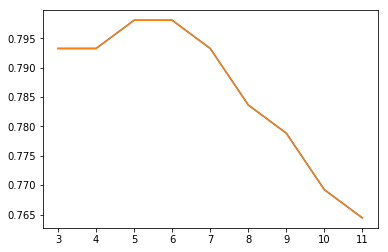

In [32]:
plt.plot(dimension, accuracy)
show()